In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import requests
from mpl_toolkits.basemap import Basemap

from relative_popularity_reports import load_and_process

%matplotlib inline

In [2]:
# Get cities geo-locations
df = pd.read_csv('data/cities_4th_Jul_2014.csv')
df['long'] = df['lat_long'].str[5:].astype(float)
df.index = range(0,len(df))

In [3]:
#Find Min Max for quadrants
print(df['long'].min(), df['long'].max())
print(df['lat'].min(), df['lat'].max())

(-123.0, -72.0)
(26, 49)


In [4]:
# control marker color and size based on magnitude
def create_marker(count):
    markersize = count * 5
    if count < 2:
        return '#FA9169', markersize
    if count < 4:
        return '#FAB669', markersize
    if count < 6:
        return '#FADA69', markersize
    if count < 8:
        return '#fff468', markersize
    else:
        return '#F6FA69', markersize


def create_png(cities, outfile): 

  # Set up Basemap
    mpl.rcParams['figure.figsize'] = '16, 12'
    #m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
    #    projection='lcc',lat_1=33,lat_2=45,lat_0=49,lon_0=-123)
    
    m =Basemap(projection='merc', lat_0 = 49, lon_0 = -123, 
               resolution='c',
               llcrnrlon=-133.0, llcrnrlat=22,
               urcrnrlon=-65.0, urcrnrlat=50.5)
    
    m.drawcoastlines(linewidth='1.2', color='#d0b77b')
    m.drawcountries(linewidth='1.2', color='#d0b77b')
    m.fillcontinents(color='0.25',lake_color='0.4', zorder=0)
    m.drawmapboundary(fill_color='0.4',zorder=0)

    # add Aggregated location sightings to plot
    
    for c in range(0,len(cities)):
        x, y = m(cities['long'][c], cities['lat'][c])
        mcolor, msize = create_marker(cities['city'][c])
        m.plot(x, y, color=mcolor, marker='o', markersize=msize, alpha=0.7)
    
    labels = ['Seattle', 'Denver', 'Chicago','New York']
    ly = [49,41,43, 39.5]
    lx = [-120, -103.5,-87,-74]
    for label, xpt, ypt in zip(labels, lx, ly):
        x, y = m(xpt,ypt)
        plt.text(x, y, label, color='0.85', size=16, weight='bold')

  # add a title
    plt.savefig(outfile)

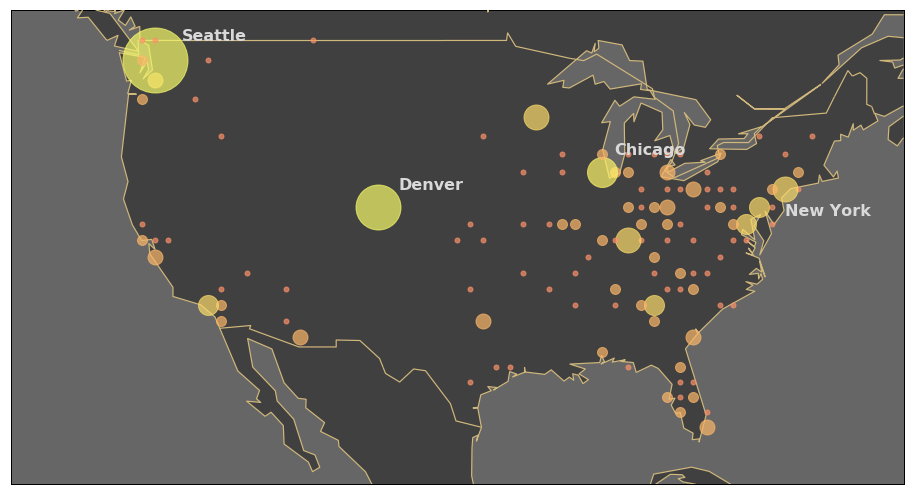

In [6]:
create_png(df,'data/image.png')